In [ ]:
!pip install opencv-python

In [ ]:

!pip install matplotlib


In [ ]:
!pip install tensorflow


In [ ]:
!pip install -q tensorflow tensorflow-datasets
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:

import matplotlib.pyplot as plt

NameError: name 'pwd' is not defined

Handling data


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import os
import shutil

os.getcwd()

'C:\\Users\\ddz706\\Documents\\skinCancer'

In [ ]:
csv = pd.read_csv('HAM10000_metadata.csv')
img_D = os.getcwd() + "/images/"
data_D = os.getcwd() + "/data/"
label=csv['dx'].unique().tolist()


label_images = []
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = csv[csv['dx'] == i]['image_id']
    label_images.extend(sample)

    for id in label_images:
        shutil.copyfile((img_D + "/" + id + ".jpg"), (data_D + id + "/" + id + ".jpg"))

    label_images = []

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64
['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']


Dividing the data into train and test


In [ ]:
pip install split-folders
import splitfolders
splitfolders.ratio("data/", output="datset",
    seed=50, ratio=(.8, .2), group_prefix=None, move=False)


Copying files: 10015 files [01:49, 91.57 files/s]


uploading data

In [ ]:
import cv2
cv2.__version__


'4.6.0'

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

flow from directory method

In [ ]:

# how the data will be processed
datagen = ImageDataGenerator(
    rescale = 1./255,
  #  dtype = tf.float32,

)


datagen = ImageDataGenerator(rescale = 1./255)


# directory
train_D1 = datagen.flow_from_directory('datset/train/',
                                    target_size = (200,200),
                                    batch_size = 10,
                                #   color_mode = 'grayscale',
                                    class_mode = 'categorical')



Found 8010 images belonging to 7 classes.


In [ ]:
datagen2 = ImageDataGenerator(rescale = 1./255)


test_D1 = datagen2.flow_from_directory('datset/val/',
                                    target_size = (200,200),
                                    batch_size = 10,
                               #   color_mode = 'grayscale',
                                    class_mode = 'categorical')

Found 2005 images belonging to 7 classes.


In [ ]:
#train_D.class_indices
train_D1.classes
#train_D.image_shape

array([0, 0, 0, ..., 6, 6, 6])

Flow from directory did not work / fit my model because of data fromat. new method is
implemented below

Processing data: with workable method

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
imgH= imgW = 200
batch = 10

In [ ]:


train_D= tf.keras.preprocessing.image_dataset_from_directory(
    'datset/train/',
    batch_size = batch,
    image_size=(imgH,imgW),
    color_mode = 'grayscale',
    labels= 'inferred',
    label_mode = "int",
    shuffle= True,
)



Found 8010 files belonging to 7 classes.


In [ ]:
test_D = tf.keras.preprocessing.image_dataset_from_directory(
    'datset/val/',
    batch_size = batch,
    image_size=(imgH,imgW),
    color_mode = 'grayscale',
    labels= 'inferred',
    label_mode = "int",
    shuffle= True,
)

Found 2005 files belonging to 7 classes.


In [ ]:
classes = train_D.class_names
print(classes)

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


Preview data

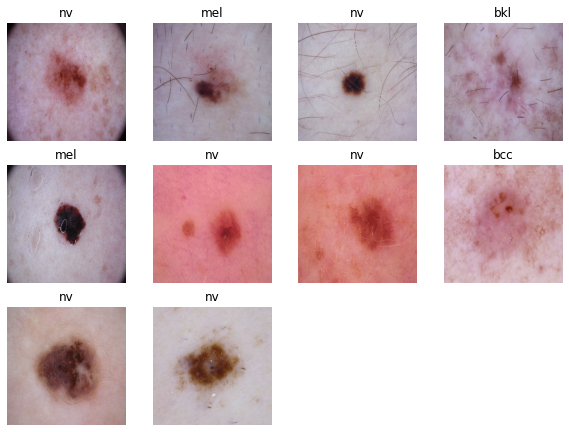

In [ ]:
plt.figure(figsize=(10,10))
for img, lable in train_D.take(1):
    for i in range (10):
        ax = plt.subplot(4, 4, i+ 1)
        plt.axis("off")
        plt.imshow(img[i].numpy().astype("int32"))
        plt.title(classes[lable[i]])

In [ ]:
train_D

<BatchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
test_D

<BatchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

CNN
  

In [ ]:
network_1 = keras.Sequential(
    [
        keras.layers.Conv2D(50, 4, activation='relu', input_shape = (200, 200,1)),
        keras.layers.Conv2D(25, 4, activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(60, activation='relu'),
        keras.layers.Dense(7, activation='softmax')
    ]
)


In [ ]:
network_1.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'] )


In [ ]:
network_1.fit(train_D, epochs= 10)

Epoch 1/10
801/801 [==============================] - 530s 661ms/step - loss: 17.1559 - accuracy: 0.6640
Epoch 2/10
801/801 [==============================] - 514s 641ms/step - loss: 1.1302 - accuracy: 0.6704
Epoch 3/10
801/801 [==============================] - 487s 607ms/step - loss: 1.1130 - accuracy: 0.6753
Epoch 4/10
801/801 [==============================] - 484s 604ms/step - loss: 1.0893 - accuracy: 0.6851
Epoch 5/10
801/801 [==============================] - 484s 604ms/step - loss: 1.0468 - accuracy: 0.7006
Epoch 6/10
801/801 [==============================] - 483s 603ms/step - loss: 1.0014 - accuracy: 0.7150
Epoch 7/10
801/801 [==============================] - 483s 603ms/step - loss: 0.9602 - accuracy: 0.7257
Epoch 8/10
801/801 [==============================] - 483s 603ms/step - loss: 0.9357 - accuracy: 0.7357
Epoch 9/10
801/801 [==============================] - 484s 604ms/step - loss: 0.9049 - accuracy: 0.7467
Epoch 10/10
801/801 [==============================] - 483s 603

In [ ]:
network_1.fit(train_D, epochs= 20)

Epoch 1/20
801/801 [==============================] - 484s 604ms/step - loss: 0.8518 - accuracy: 0.7625
Epoch 2/20
801/801 [==============================] - 484s 604ms/step - loss: 0.8705 - accuracy: 0.7549
Epoch 3/20
801/801 [==============================] - 483s 603ms/step - loss: 0.9606 - accuracy: 0.7303
Epoch 4/20
801/801 [==============================] - 483s 603ms/step - loss: 0.8861 - accuracy: 0.7507
Epoch 5/20
801/801 [==============================] - 483s 603ms/step - loss: 0.8976 - accuracy: 0.7592
Epoch 6/20
801/801 [==============================] - 483s 602ms/step - loss: 1.0852 - accuracy: 0.6901
Epoch 7/20
801/801 [==============================] - 483s 603ms/step - loss: 1.0740 - accuracy: 0.6934
Epoch 8/20
801/801 [==============================] - 482s 602ms/step - loss: 1.0643 - accuracy: 0.7029
Epoch 9/20
801/801 [==============================] - 483s 603ms/step - loss: 1.0548 - accuracy: 0.7019
Epoch 10/20
801/801 [==============================] - 484s 604m

In [ ]:
network_1.fit(train_D, epochs= 50)

Epoch 1/50
801/801 [==============================] - 514s 641ms/step - loss: 0.9610 - accuracy: 0.7305
Epoch 2/50
801/801 [==============================] - 513s 640ms/step - loss: 1.0885 - accuracy: 0.7065
Epoch 3/50
801/801 [==============================] - 513s 640ms/step - loss: 1.0161 - accuracy: 0.7152
Epoch 4/50
801/801 [==============================] - 518s 647ms/step - loss: 1.0036 - accuracy: 0.7199
Epoch 5/50
801/801 [==============================] - 518s 647ms/step - loss: 1.0033 - accuracy: 0.7182
Epoch 6/50
801/801 [==============================] - 518s 646ms/step - loss: 1.0030 - accuracy: 0.7207
Epoch 7/50
801/801 [==============================] - 503s 628ms/step - loss: 1.0720 - accuracy: 0.7042
Epoch 8/50
801/801 [==============================] - 502s 627ms/step - loss: 1.0013 - accuracy: 0.7291
Epoch 9/50
801/801 [==============================] - 503s 627ms/step - loss: 1.0304 - accuracy: 0.7066
Epoch 10/50
801/801 [==============================] - 503s 628m

In [ ]:
network_1.fit(train_D, epochs= 50)

Epoch 1/50
801/801 [==============================] - 504s 629ms/step - loss: 0.9351 - accuracy: 0.7499
Epoch 2/50
801/801 [==============================] - 504s 629ms/step - loss: 0.9123 - accuracy: 0.7468
Epoch 3/50
801/801 [==============================] - 503s 628ms/step - loss: 1.0027 - accuracy: 0.7318
Epoch 4/50
801/801 [==============================] - 503s 627ms/step - loss: 1.0407 - accuracy: 0.7019
Epoch 5/50
801/801 [==============================] - 503s 627ms/step - loss: 1.0230 - accuracy: 0.7084
Epoch 6/50
801/801 [==============================] - 503s 628ms/step - loss: 1.0405 - accuracy: 0.7197
Epoch 7/50
801/801 [==============================] - 503s 627ms/step - loss: 1.0289 - accuracy: 0.7075
Epoch 8/50
801/801 [==============================] - 503s 628ms/step - loss: 1.0079 - accuracy: 0.7145
Epoch 9/50
801/801 [==============================] - 503s 628ms/step - loss: 1.0583 - accuracy: 0.7087
Epoch 10/50
801/801 [==============================] - 503s 628m

In [ ]:
network_1.save('./models')

INFO:tensorflow:Assets written to: ./models\assets


INFO:tensorflow:Assets written to: ./models\assets


In [ ]:
load_Model = keras.models.load_model('./models')

In [ ]:
load_Model.evaluate(test_D)

201/201 [==============================] - 17s 81ms/step - loss: 18.3571 - accuracy: 0.6449


[18.35707664489746, 0.6448878049850464]

The above model gave 64 accuracy . 2nd highest.

In [ ]:
load_Model.fit(train_D, epochs= 15, shuffle = True)

Epoch 1/15
801/801 [==============================] - 493s 615ms/step - loss: 0.8534 - accuracy: 0.7775
Epoch 2/15
801/801 [==============================] - 481s 600ms/step - loss: 0.9141 - accuracy: 0.7557
Epoch 3/15
801/801 [==============================] - 475s 593ms/step - loss: 0.8893 - accuracy: 0.7694
Epoch 4/15
801/801 [==============================] - 475s 593ms/step - loss: 1.0327 - accuracy: 0.7340
Epoch 5/15
801/801 [==============================] - 475s 593ms/step - loss: 0.9273 - accuracy: 0.7483
Epoch 6/15
801/801 [==============================] - 475s 593ms/step - loss: 0.9700 - accuracy: 0.7532
Epoch 7/15
801/801 [==============================] - 475s 593ms/step - loss: 0.8664 - accuracy: 0.7612
Epoch 8/15
801/801 [==============================] - 478s 596ms/step - loss: 0.7805 - accuracy: 0.8001
Epoch 9/15
801/801 [==============================] - 475s 593ms/step - loss: 0.8251 - accuracy: 0.7787
Epoch 10/15
801/801 [==============================] - 475s 593m

In [ ]:
load_Model.evaluate(test_D)

201/201 [==============================] - 16s 78ms/step - loss: 15.6006 - accuracy: 0.6439


[15.600625038146973, 0.6438902616500854]

In [ ]:
load_Model.save('./models_2')

INFO:tensorflow:Assets written to: ./models_2\assets


INFO:tensorflow:Assets written to: ./models_2\assets


In [ ]:
load_Model.save('alternate_model_2_.h5')

NameError: name 'load_Model' is not defined

trained again but same accuracy

CNN 2

In [ ]:
network_2 = keras.Sequential(
    [
        keras.layers.Conv2D(50, 4, activation='relu', input_shape = (200, 200,1)),
        keras.layers.Conv2D(25, 4, activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(20, 4, activation='relu'),
        keras.layers.MaxPooling2D(),

        keras.layers.Conv2D(15, 4, activation='relu'),
        keras.layers.MaxPooling2D(),

        keras.layers.Flatten(),
        keras.layers.Dense(60, activation='relu'),
        keras.layers.Dense(7, activation='softmax')
    ]
)


In [ ]:
network_2.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'] )


In [ ]:
network_2.fit(train_D, epochs= 3)

Epoch 1/3
801/801 [==============================] - 458s 571ms/step - loss: 1.2800 - accuracy: 0.6629
Epoch 2/3
801/801 [==============================] - 475s 593ms/step - loss: 1.1399 - accuracy: 0.6697
Epoch 3/3
801/801 [==============================] - 454s 567ms/step - loss: 1.1483 - accuracy: 0.6692


In [ ]:
network_2.evaluate(test_D)

201/201 [==============================] - 15s 76ms/step - loss: 1.1345 - accuracy: 0.6688


[1.1344985961914062, 0.6688279509544373]

In [ ]:
network_2.save('./models_4')
network_2.save('alternate668_model_4.h5')


INFO:tensorflow:Assets written to: ./models_4\assets


INFO:tensorflow:Assets written to: ./models_4\assets


In [ ]:
network_2.fit(train_D, epochs= 5, shuffle  = True)

Epoch 1/5
801/801 [==============================] - 454s 567ms/step - loss: 1.2953 - accuracy: 0.6682
Epoch 2/5
801/801 [==============================] - 495s 617ms/step - loss: 1.1704 - accuracy: 0.6693
Epoch 3/5
801/801 [==============================] - 450s 562ms/step - loss: 1.1323 - accuracy: 0.6698
Epoch 4/5
801/801 [==============================] - 459s 573ms/step - loss: 1.1312 - accuracy: 0.6699
Epoch 5/5
801/801 [==============================] - 434s 542ms/step - loss: 1.1315 - accuracy: 0.6699


In [ ]:
network_2.evaluate(test_D)

201/201 [==============================] - 16s 79ms/step - loss: 1.1389 - accuracy: 0.6673


[1.1389230489730835, 0.6673316955566406]

In [ ]:

# save the model if the above accuracy is above 66
load_Model.save('./models_4')
load_Model.save('alternate66_model_4.h5')

the above model gave 66 accuracy the highest.
alternate668_model_4.h5

Improving accuracy by manipulating/ augmentation data

web interface


In [ ]:
pip install gradio

In [ ]:
!pip install --quiet gradio

In [ ]:
import gradio as gr

In [ ]:
network = tf.keras.models.load_model('alternate668_model_4.h5')

In [ ]:
# classes =['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
# classes is defind on top if it doesnt work uncomment the above line
def function(img):
    image = img.reshape((-1, 200, 200, 1))
    predict = network_3.predict(image)[0]
    return {classes[i]: float(predict[i]) for i in range(7)}

image = gr.inputs.Image(shape= (200,200))
label = gr.outputs.Label(num_top_classes=7)

frame=gr.Interface(fn = function, inputs = image , outputs = label)
frame.launch()

C:\ProgramData\Anaconda3\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\ProgramData\Anaconda3\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7875/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x24b0fc1e9d0>, 'http://127.0.0.1:7875/', None)

1/1 [==============================] - 0s 40ms/step


In [ ]:
Rescale_data = ImageDataGenerator(
    rescale = 1./255,
    rotation_range =30,
    horizontal_flip = True,
    zoom_range = 0.2

)
Resacle_train_D = Rescale_data.flow_from_directory(

    'datset/train/',
    target_size = (200,200),
    batch_size = batch
)

Resacle_train_D = tf.data.Dataset.from_generator(
    lambda: Resacle_train_D,
    output_types =(tf.float32, tf.float32),
    output_shapes =([None, 200,200, 1], [None, 7] )

)


Found 8010 images belonging to 7 classes.


In [ ]:
Resacle_test_D

<FlatMapDataset element_spec=(TensorSpec(shape=(None, 200, 200, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

CNN type 3

In [ ]:
imgH= imgW = 200
batch = 10
train_D3 = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset2/train/',
    batch_size = batch,
    image_size=(imgH,imgW),
    color_mode = 'grayscale',
    labels= 'inferred',
    label_mode = "int",
    shuffle= True,
)

test_D3 = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset2/val/',
    batch_size = batch,
    image_size=(imgH,imgW),
    color_mode = 'grayscale',
    labels= 'inferred',
    label_mode = "int",
    shuffle= True,
)

Found 2198 files belonging to 7 classes.
Found 1978 files belonging to 7 classes.


In [ ]:
test_D3 = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset2/val/',
    batch_size = batch,
    image_size=(imgH,imgW),
    color_mode = 'grayscale',
    labels= 'inferred',
    label_mode = "int",
    shuffle= True,
)

Found 420 files belonging to 7 classes.


In [ ]:
network_3 = keras.Sequential(
    [
        keras.layers.Conv2D(50, 4, activation='relu', input_shape = (200, 200,1)),
        keras.layers.Conv2D(25, 4, activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(20, 4, activation='relu'),
        keras.layers.MaxPooling2D(),

        keras.layers.Conv2D(15, 4, activation='relu'),
        keras.layers.MaxPooling2D(),

        keras.layers.Flatten(),
        keras.layers.Dense(60, activation='relu'),
        keras.layers.Dense(7, activation='softmax')
    ]
)


In [ ]:
network_3.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'] )


In [ ]:
network_3.fit(train_D3, epochs= 10, shuffle  = True)

Epoch 1/10
220/220 [==============================] - 120s 544ms/step - loss: 1.9587 - accuracy: 0.3867
Epoch 2/10
220/220 [==============================] - 121s 551ms/step - loss: 1.5708 - accuracy: 0.4063
Epoch 3/10
220/220 [==============================] - 122s 553ms/step - loss: 1.4889 - accuracy: 0.4122
Epoch 4/10
220/220 [==============================] - 119s 542ms/step - loss: 1.4570 - accuracy: 0.4204
Epoch 5/10
220/220 [==============================] - 119s 543ms/step - loss: 1.3443 - accuracy: 0.4768
Epoch 6/10
220/220 [==============================] - 119s 542ms/step - loss: 1.2546 - accuracy: 0.5096
Epoch 7/10
220/220 [==============================] - 119s 542ms/step - loss: 1.4147 - accuracy: 0.5478
Epoch 8/10
220/220 [==============================] - 119s 542ms/step - loss: 1.1900 - accuracy: 0.5428
Epoch 9/10
220/220 [==============================] - 121s 550ms/step - loss: 1.0460 - accuracy: 0.5987
Epoch 10/10
220/220 [==============================] - 119s 543m

In [ ]:
network_3.fit(train_D3, epochs= 10, shuffle  = True)

Epoch 1/10
220/220 [==============================] - 125s 566ms/step - loss: 0.8845 - accuracy: 0.6620
Epoch 2/10
220/220 [==============================] - 122s 556ms/step - loss: 0.7514 - accuracy: 0.7152
Epoch 3/10
220/220 [==============================] - 129s 585ms/step - loss: 0.7047 - accuracy: 0.7338
Epoch 4/10
220/220 [==============================] - 123s 559ms/step - loss: 0.6586 - accuracy: 0.7557
Epoch 5/10
220/220 [==============================] - 121s 551ms/step - loss: 0.5857 - accuracy: 0.7880
Epoch 6/10
220/220 [==============================] - 122s 553ms/step - loss: 0.4828 - accuracy: 0.8226
Epoch 7/10
220/220 [==============================] - 125s 568ms/step - loss: 0.4669 - accuracy: 0.8417
Epoch 8/10
220/220 [==============================] - 125s 566ms/step - loss: 0.4243 - accuracy: 0.8526
Epoch 9/10
220/220 [==============================] - 124s 563ms/step - loss: 0.4113 - accuracy: 0.8581
Epoch 10/10
220/220 [==============================] - 122s 553m

In [ ]:
network_3.evaluate(test_D3)

42/42 [==============================] - 3s 79ms/step - loss: 8.7427 - accuracy: 0.2571


[8.74268627166748, 0.2571428716182709]

In [ ]:
network_3.save('./last_model')
network_3.save('last_model.h5')

INFO:tensorflow:Assets written to: ./last_model\assets


INFO:tensorflow:Assets written to: ./last_model\assets


training original data on model 3

In [ ]:
network_3.fit(train_D, epochs= 10, shuffle  = True)

Epoch 1/10
801/801 [==============================] - 413s 516ms/step - loss: 1.3678 - accuracy: 0.6608
Epoch 2/10
801/801 [==============================] - 411s 513ms/step - loss: 1.1473 - accuracy: 0.6693
Epoch 3/10
801/801 [==============================] - 409s 510ms/step - loss: 1.1323 - accuracy: 0.6699
Epoch 4/10
801/801 [==============================] - 411s 513ms/step - loss: 1.1736 - accuracy: 0.6695
Epoch 5/10
801/801 [==============================] - 411s 513ms/step - loss: 1.1322 - accuracy: 0.6695
Epoch 6/10
801/801 [==============================] - 408s 510ms/step - loss: 1.1315 - accuracy: 0.6695
Epoch 7/10
801/801 [==============================] - 408s 510ms/step - loss: 1.1319 - accuracy: 0.6697
Epoch 8/10
801/801 [==============================] - 409s 510ms/step - loss: 1.1318 - accuracy: 0.6698
Epoch 9/10
801/801 [==============================] - 408s 509ms/step - loss: 1.1319 - accuracy: 0.6697
Epoch 10/10
801/801 [==============================] - 409s 510m

In [ ]:
network_3.save('./models3_1')
network_3.save('alternatemodels3_1.h5')

INFO:tensorflow:Assets written to: ./models3_1\assets


INFO:tensorflow:Assets written to: ./models3_1\assets


In [ ]:
network_3.fit(train_D, epochs= 20)

Epoch 1/20
801/801 [==============================] - 409s 510ms/step - loss: 1.1402 - accuracy: 0.6694
Epoch 2/20
801/801 [==============================] - 408s 509ms/step - loss: 1.1322 - accuracy: 0.6697
Epoch 3/20
801/801 [==============================] - 444s 555ms/step - loss: 1.1322 - accuracy: 0.6698
Epoch 4/20
801/801 [==============================] - 452s 564ms/step - loss: 1.1320 - accuracy: 0.6698
Epoch 5/20
801/801 [==============================] - 446s 557ms/step - loss: 1.1319 - accuracy: 0.6698
Epoch 6/20
801/801 [==============================] - 448s 559ms/step - loss: 1.1342 - accuracy: 0.6697
Epoch 7/20
801/801 [==============================] - 449s 560ms/step - loss: 1.1319 - accuracy: 0.6698
Epoch 8/20
801/801 [==============================] - 445s 556ms/step - loss: 1.1317 - accuracy: 0.6698
Epoch 9/20
801/801 [==============================] - 452s 565ms/step - loss: 1.1320 - accuracy: 0.6698
Epoch 10/20
801/801 [==============================] - 453s 565m

In [ ]:
network_3.save('./models3_2')
network_3.save('alternatemodels3_2.h5')

INFO:tensorflow:Assets written to: ./models3_2\assets


INFO:tensorflow:Assets written to: ./models3_2\assets


In [ ]:
network_3.fit(train_D, epochs= 25)

Epoch 1/25
801/801 [==============================] - 436s 544ms/step - loss: 1.1317 - accuracy: 0.6698
Epoch 2/25
801/801 [==============================] - 435s 543ms/step - loss: 1.1317 - accuracy: 0.6698
Epoch 3/25
801/801 [==============================] - 435s 544ms/step - loss: 1.1317 - accuracy: 0.6698
Epoch 4/25
801/801 [==============================] - 441s 551ms/step - loss: 1.1318 - accuracy: 0.6698
Epoch 5/25
801/801 [==============================] - 435s 543ms/step - loss: 1.1317 - accuracy: 0.6698
Epoch 6/25
801/801 [==============================] - 435s 543ms/step - loss: 1.1316 - accuracy: 0.6698
Epoch 7/25
801/801 [==============================] - 435s 543ms/step - loss: 1.1318 - accuracy: 0.6698
Epoch 8/25
801/801 [==============================] - 434s 541ms/step - loss: 1.1319 - accuracy: 0.6698
Epoch 9/25
801/801 [==============================] - 432s 540ms/step - loss: 1.1318 - accuracy: 0.6698
Epoch 10/25
801/801 [==============================] - 433s 541m

In [ ]:
network_3.save('./models3_3')
network_3.save('alternatemodels3_3.h5')

INFO:tensorflow:Assets written to: ./models3_3\assets


INFO:tensorflow:Assets written to: ./models3_3\assets


In [ ]:
network_3.fit(train_D, epochs= 30)

Epoch 1/30
801/801 [==============================] - 433s 541ms/step - loss: 1.1316 - accuracy: 0.6698
Epoch 2/30
801/801 [==============================] - 434s 542ms/step - loss: 1.1316 - accuracy: 0.6698
Epoch 3/30
801/801 [==============================] - 434s 542ms/step - loss: 1.1315 - accuracy: 0.6698
Epoch 4/30
801/801 [==============================] - 434s 541ms/step - loss: 1.1316 - accuracy: 0.6698
Epoch 5/30
801/801 [==============================] - 434s 542ms/step - loss: 1.1314 - accuracy: 0.6698
Epoch 6/30
801/801 [==============================] - 434s 542ms/step - loss: 1.1315 - accuracy: 0.6698
Epoch 7/30
801/801 [==============================] - 434s 542ms/step - loss: 1.1316 - accuracy: 0.6698
Epoch 8/30
801/801 [==============================] - 434s 542ms/step - loss: 1.1315 - accuracy: 0.6698
Epoch 9/30
801/801 [==============================] - 434s 542ms/step - loss: 1.1315 - accuracy: 0.6698
Epoch 10/30
801/801 [==============================] - 434s 542m

In [ ]:
network_3.save('./models3_4')
network_3.save('alternatemodels3_4.h5')

INFO:tensorflow:Assets written to: ./models3_4\assets


INFO:tensorflow:Assets written to: ./models3_4\assets


In [ ]:
network_3=tf.keras.models.load_model('alternatemodels3_4.h5')
network_3.evaluate(test_D)

201/201 [==============================] - 16s 77ms/step - loss: 1.1344 - accuracy: 0.6688


[1.134384274482727, 0.6688279509544373]

still same accuracy


    
        demo

In [ ]:
load_network_3 =tf.keras.models.load_model('alternatemodels3_4.h5')

In [ ]:
load_Last_network= tf.keras.models.load_model('last_model.h5')

In [ ]:
# classes =['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
# classes is defind on top if it doesnt work uncomment the above line
def function(img):
    image = img.reshape((-1, 200, 200, 1))
    predict = load_Last_network.predict(image)[0]
    return {classes[i]: float(predict[i]) for i in range(7)}

image = gr.inputs.Image(shape= (200,200))
label = gr.outputs.Label(num_top_classes=7)

frame=gr.Interface(fn = function, inputs = image , outputs = label)
frame.launch(share=True)

C:\ProgramData\Anaconda3\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\ProgramData\Anaconda3\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7877/
Running on public URL: https://57665.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x24b1756e070>,
 'http://127.0.0.1:7877/',
 'https://57665.gradio.app')

1/1 [==============================] - 0s 34ms/step


Live capture

In [ ]:
import cv2
cv2.__version__

'4.6.0'

In [ ]:
## LIVE TESTING DATA
names = classes
cap= cv2.VideoCapture(0)
while True:
  #read
  #frame= the pic
  ret, frame = cap.read()
  frame = cv2.flip(frame, 1)




# where to get the live image
  cv2.rectangle(frame, (10,10),(300,300), (255,0,0),1)
  frame= cv2.resize(frame,(200,200))
  frame= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  cv2.imshow('camera', frame)



  prediction= network_1.predict(frame.reshape(1,200,200,1))
  show= names[prediction.argmax()]

  cv2.putText(frame, show,(10,120),cv2.FONT_HERSHEY_PLAIN,2, (0,255,255),1)
  cv2.imshow("frame", frame)
  if cv2.waitKey(1) == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()